In [30]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np

In [31]:
img = imageio.imread('images/scarlett.jpg')
plt.figure(figsize=(10,10))

print('ARXIKI EIKONA')
print(img)

# bit-wise operators
img_b1 = img & 0b10000000 #8 bit as our img is grayscale [0,255]
img_b2 = img & 0b01000000 #8 bit as our img is grayscale [0,255]
img_b3 = img & 0b00100000 #8 bit as our img is grayscale [0,255]
img_b4 = img & 0b00010000 #8 bit as our img is grayscale [0,255]
img_b5 = img & 0b00001000 #8 bit as our img is grayscale [0,255]
img_b6 = img & 0b00000100 #8 bit as our img is grayscale [0,255]
img_b7 = img & 0b00000010 #8 bit as our img is grayscale [0,255]
img_b8 = img & 0b00000001 #8 bit as our img is grayscale [0,255]


#print('EIKONA META TO AND 128')
#print(img_b1)

print('EIKONA META TO AND 128')
print(img_b2)
v = int('0b10000000', 2) 


v = int('0b01000000', 2) 


v = int('0b00100000', 2) 


v = int('0b00010000', 2) 


v = int('0b00001000', 2) 



v = int('0b00000100', 2) 



v = int('0b00000010', 2) 

v = int('0b00000001', 2) 





ARXIKI EIKONA
[[251 253 254 ... 247 248 250]
 [250 251 251 ... 248 248 249]
 [252 252 251 ... 249 248 249]
 ...
 [111 127 106 ... 165  95 150]
 [139 116 159 ...  99 118 122]
 [147 122 165 ... 125 109 150]]
EIKONA META TO AND 128
[[64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 ...
 [64 64 64 ...  0 64  0]
 [ 0 64  0 ... 64 64 64]
 [ 0 64  0 ... 64 64  0]]


<Figure size 720x720 with 0 Axes>

In [5]:
A = np.random.randint(0,8,[5,5])
print(A)

[[7 6 2 0 1]
 [1 3 6 5 2]
 [0 3 2 4 3]
 [6 6 3 3 3]
 [4 6 5 2 7]]


In [15]:
def histogram(A, no_levels):
    N, M = A.shape # NxM image/matrix --> img may not be square
    hist = np.zeros(no_levels).astype(int) #bucket
    #print(hist.shape)
    #print(hist)
    for i in range(no_levels):
        pixel_value_i = np.sum(A==i)
        hist[i] = pixel_value_i
        
    return hist

Text(0, 0.5, 'Frequency')

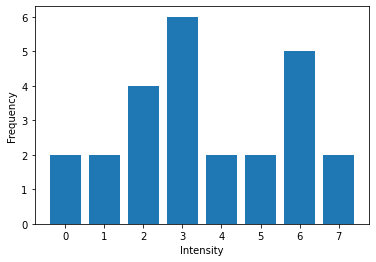

In [16]:
hist_A = histogram(A,8)
plt.bar(range(8), hist_A)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

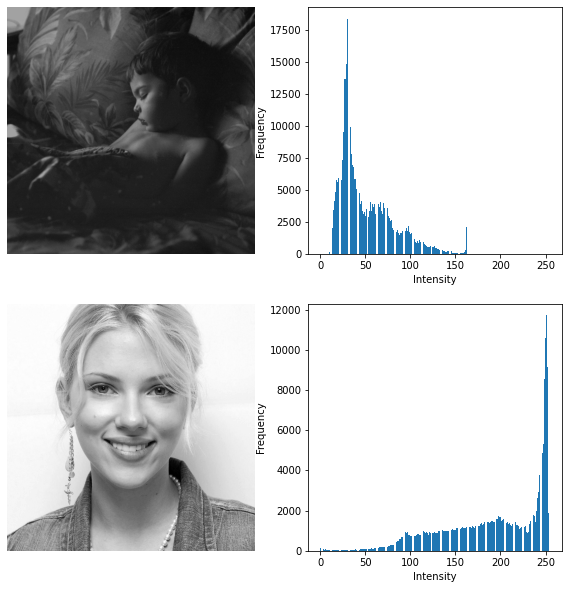

In [17]:
img1 = imageio.imread('images/nap.jpg')
img2 = imageio.imread('images/scarlett.jpg')

# compute histograms
hist_img1 = histogram(img1, 256)
hist_img2 = histogram(img2, 256)

# visualization
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

In [26]:
def histogram_equalization(A, no_levels):
    hist = histogram(A, no_levels)
    print(hist[0])
    histC = np.zeros(no_levels).astype(int)
    histC[0] = hist[0]
    for i in range(1, no_levels): # scan from intensity 1 up to no_levels-1
        histC[i] = hist[i] + histC[i-1]
        
    hist_transform = np.zeros(no_levels).astype(np.uint8)
    
    N, M = A.shape
    
    A_eq = np.zeros([N,M]).astype(np.uint8) #equalized "new" image
    
    for z in range(no_levels):
        scale = ((no_levels-1)/float(N*M))
        s = scale * histC[z]
        A_eq[np.where(A==z)] = s
        
        hist_transform[z] = s
        
    return (A_eq, hist_transform)

In [27]:
img1_eq, img1_transf = histogram_equalization(img1, 256)

print('ARXIKI EIKONA')
print(img1)

print('Equalized Image')
print(img1_eq)


print(img1_transf)

img2_eq, img2_transf = histogram_equalization(img2, 256)

0
ARXIKI EIKONA
[[162 162 162 ...  17  13  10]
 [162 162 162 ...  17  16  14]
 [162 162 162 ...  15  21  22]
 ...
 [ 74  75  70 ...  27  27  26]
 [ 73  73  69 ...  27  27  26]
 [ 74  74  68 ...  26  26  26]]
Equalized Image
[[254 254 254 ...   9   1   0]
 [254 254 254 ...   9   7   2]
 [254 254 254 ...   4  22  25]
 ...
 [204 206 196 ...  49  49  42]
 [202 202 194 ...  49  49  42]
 [204 204 192 ...  42  42  42]]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   4   7   9
  13  16  20  22  25  28  32  36  42  49  57  66  77  87  96 103 109 114
 118 122 125 129 132 135 137 140 142 145 147 149 151 153 154 157 158 160
 162 164 166 168 171 173 175 177 179 181 183 186 188 190 192 194 196 199
 201 202 204 206 208 210 211 213 214 215 216 217 218 220 221 222 222 223
 224 225 226 227 228 230 231 232 233 234 235 236 237 238 238 239 240 240
 241 241 242 242 243 243 244 245 245 245 246 246 246 247 247 247 248 248
 248 249 249 249 250 250 250 250 251 251 251 251 251 251 251 252 252 252


In [25]:
histeq_img1 = histogram(img1_eq, 256)
histeq_img2 = histogram(img2_eq, 256)

# visualization
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,2)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.plot(range(256), img1_transf)
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.subplot(3,2,5)
plt.imshow(img1_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

Text(0, 0.5, 'Frequency')

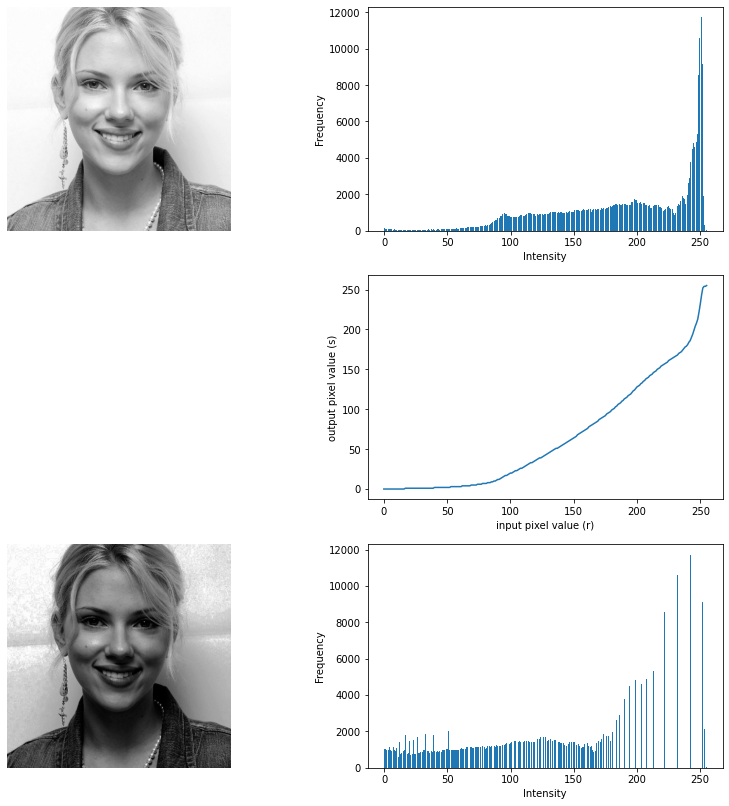

In [28]:
# visualization
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,2)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.plot(range(256), img2_transf)
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.subplot(3,2,5)
plt.imshow(img2_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')